# Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

## Column Descriptions

1. **id** ➔ Unique id for each patient  
2. **age** ➔ Age of the patient in years  
3. **origin** ➔ Place of study  
4. **sex** ➔ Male/Female  
5. **cp** ➔ Chest pain type  
   &nbsp;&nbsp;&nbsp;&nbsp; *Values*: [typical angina, atypical angina, non-anginal, asymptomatic]  
6. **trestbps** ➔ Resting blood pressure (in mm Hg on admission to the hospital)  
7. **chol** ➔ Serum cholesterol in mg/dl  
8. **fbs** ➔ Fasting blood sugar > 120 mg/dl  
9. **restecg** ➔ Resting electrocardiographic results  
   &nbsp;&nbsp;&nbsp;&nbsp; *Values*: [normal, STT abnormality, LV hypertrophy]  
10. **thalach** ➔ Maximum heart rate achieved  
11. **exang** ➔ Exercise-induced angina (True/False)  
12. **oldpeak** ➔ ST depression induced by exercise relative to rest  
13. **slope** ➔ The slope of the peak exercise ST segment  
14. **ca** ➔ Number of major vessels (0-3) colored by fluoroscopy  
15. **thal** ➔ *Values*: [normal, fixed defect, reversible defect]  
16. **num** ➔ The predicted attribute  


# Data Exploration

In [3]:
df.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
661,662,57,Male,Switzerland,asymptomatic,110.0,0.0,NaN,st-t abnormality,131.0,True,1.4,upsloping,1.0,NaN,3
543,544,53,Male,Hungary,asymptomatic,120.0,246.0,False,normal,116.0,True,0.0,NaN,NaN,NaN,1
557,558,44,Male,Hungary,asymptomatic,130.0,290.0,False,normal,100.0,True,2.0,flat,NaN,NaN,1
221,222,54,Female,Cleveland,non-anginal,108.0,267.0,False,lv hypertrophy,167.0,False,0.0,upsloping,0.0,normal,0
462,463,55,Male,Hungary,atypical angina,120.0,256.0,True,normal,137.0,False,0.0,NaN,NaN,reversable defect,0


In [4]:
# find out the dimensions of the data
df.shape

(920, 16)

In [5]:
# information about the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
print(df.isna().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


ca (major vessels), thal (thalassemia), and slope (ST segment slope) have a significant amount of missing data.

In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
# Locations involved in study
print(df.dataset.unique())

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


# Data Cleaning & Transformation

since ca (major vessels), thal (thalassemia), and slope (ST segment slope) have a lot of missing data, we'll drop those columns


In [9]:
df = df.drop(columns=['id'])  # Dropping the 'id' column

In [10]:
# Drop columns with significant amount of missing columns
df= df.drop(columns = ['ca', 'slope', 'thal'])

df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [32]:
# Fill missing values for numerical columns with the median
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing values of categorical columns with the most occurring value
categorical_columns = ['fbs', 'restecg', 'exang']
for col in categorical_columns:
    df[col] = df[col].astype(str).fillna(df[col].mode()[0])


In [12]:
# One-hot encoding on "sex" column
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Display the first few rows of the dataframe to verify the result
df.head()


,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,sex_Male
0,63,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,True
1,67,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,True
2,67,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,True
3,37,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,True
4,41,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,False


# Univariate Analysis

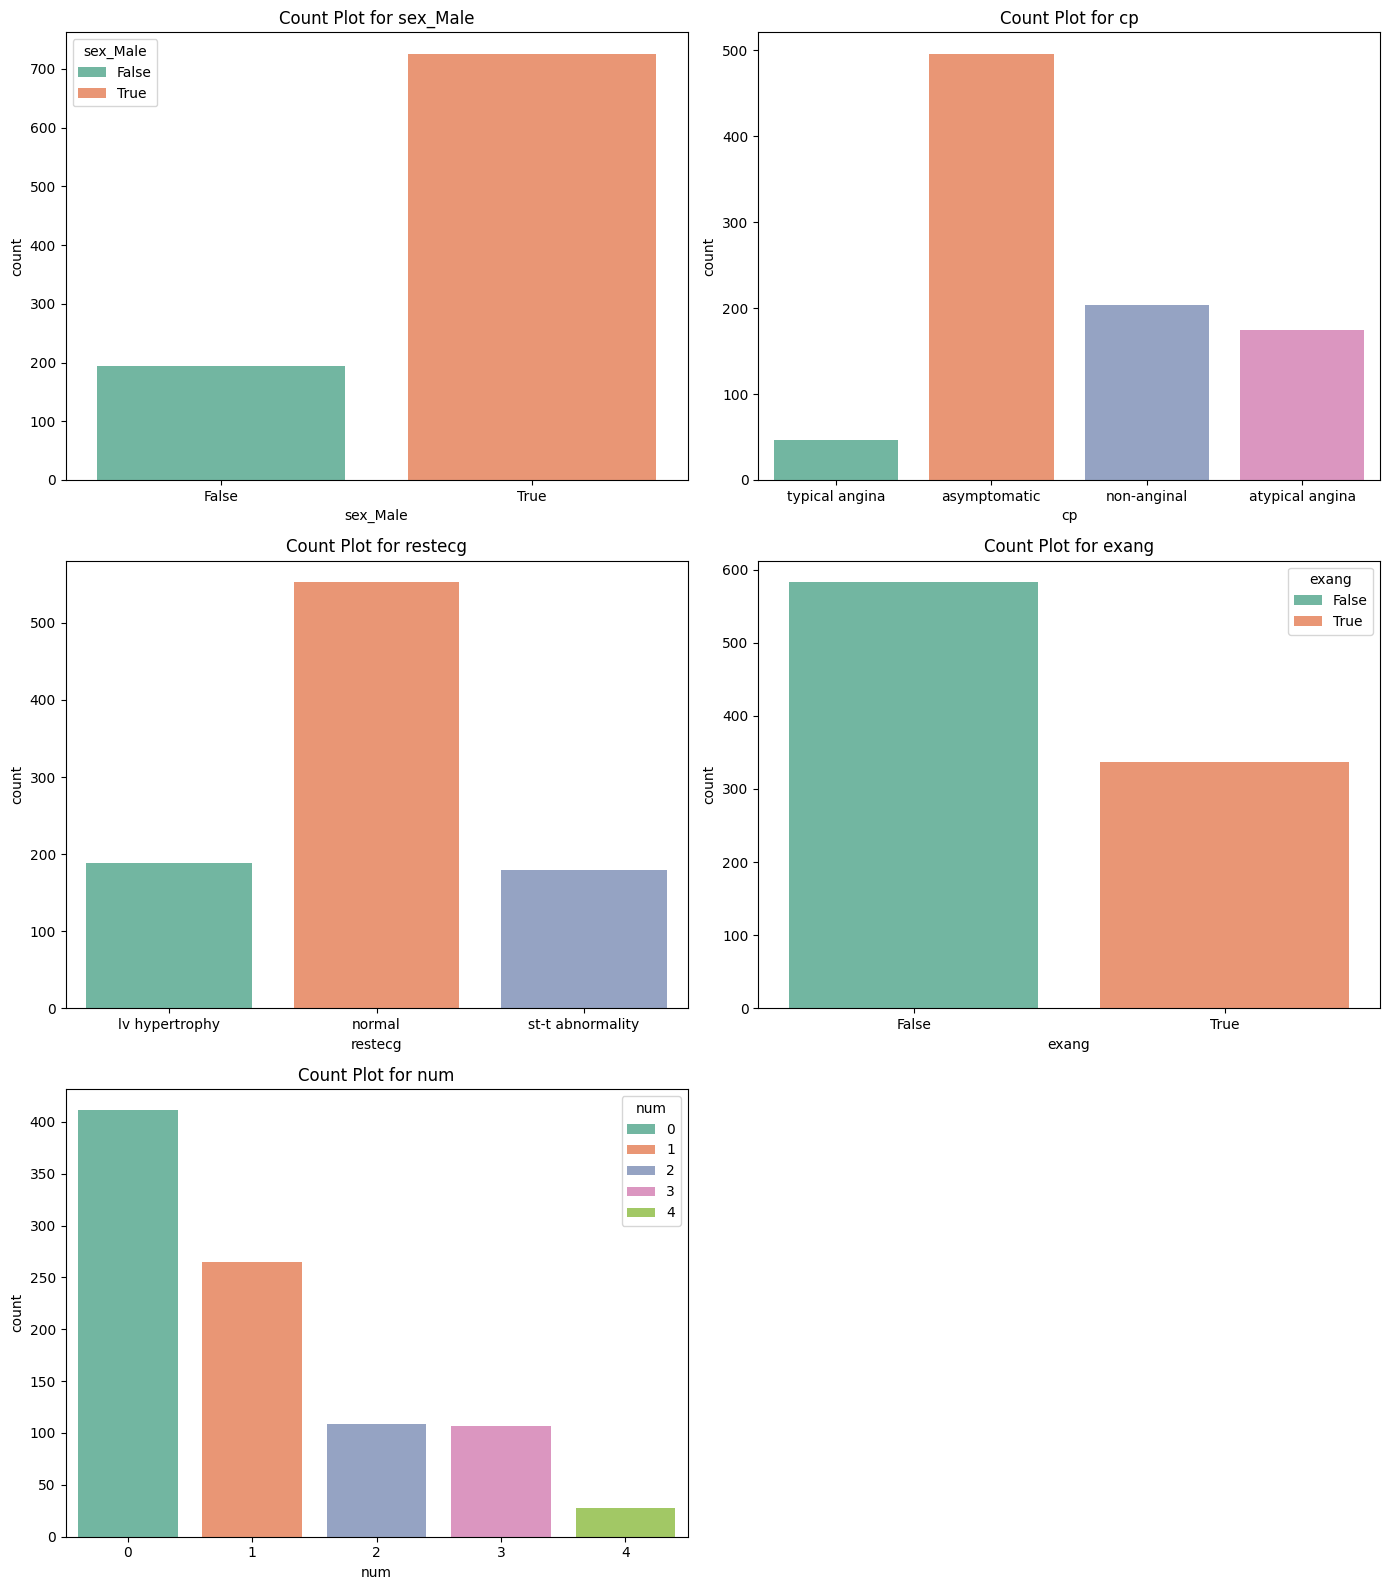

In [13]:
# List of categorical columns
categorical_columns = ['sex_Male', 'cp', 'restecg', 'exang', 'num']

# Plotting count plots for each categorical variable
plt.figure(figsize=(14, 16))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=df, hue=column, palette="Set2")
    plt.title(f'Count Plot for {column}')
    plt.tight_layout()

plt.show()

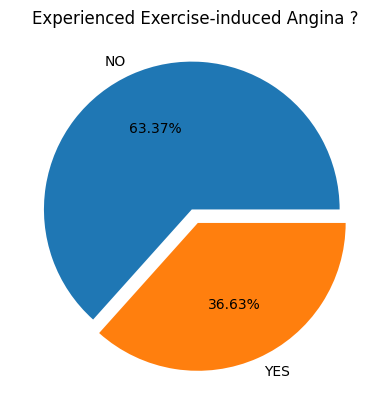

In [14]:
# Exercise-induced Angina

df.exang.value_counts().plot(kind='pie', explode=[0.05,0.05], labels=['NO', 'YES'],
autopct=lambda p: '{:.2f}%'.format(p), title = 'Experienced Exercise-induced Angina ?')
plt.ylabel('')
plt.show()


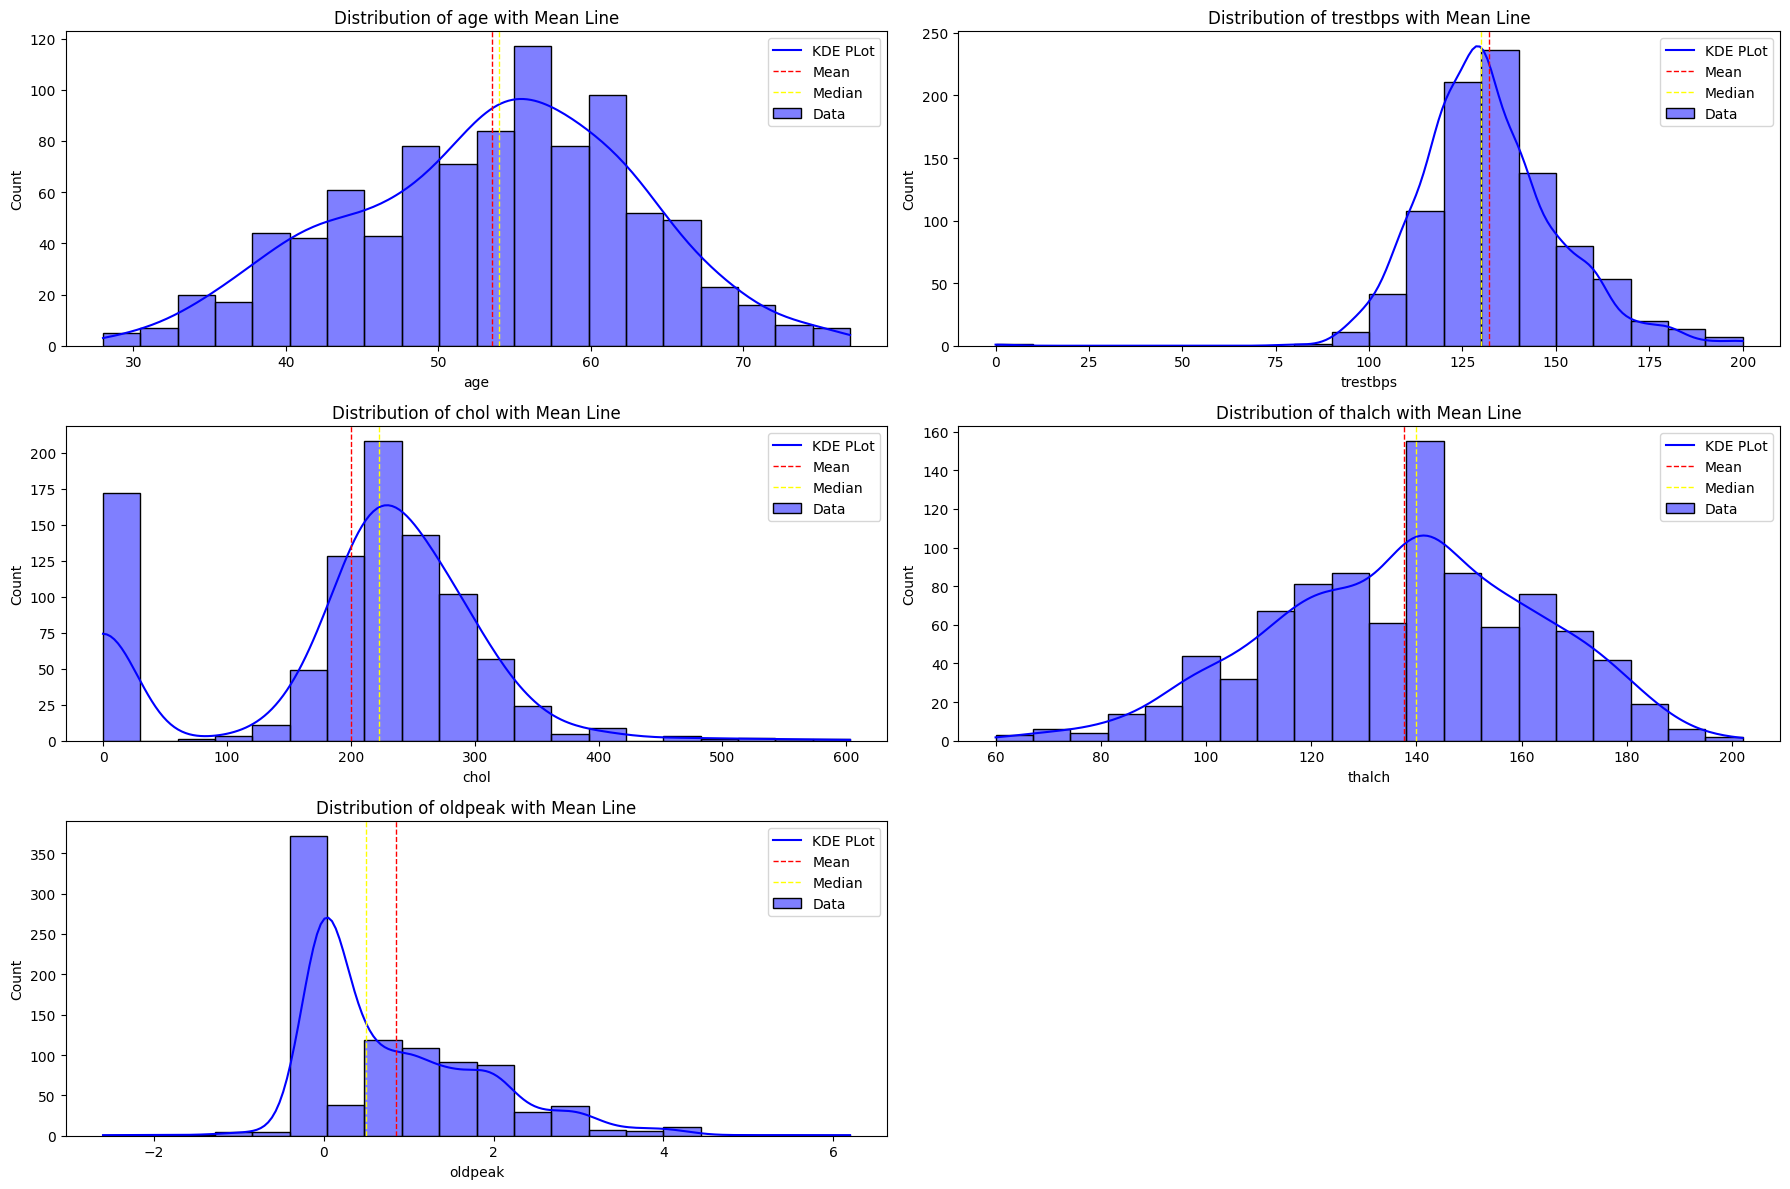

In [15]:
# List of numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Plotting histograms for numerical variables
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='blue', bins=20)
    plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df[column].median(), color='yellow', linestyle='dashed', linewidth=1)
    plt.title(f'Distribution of {column} with Mean Line')
    plt.tight_layout()
    plt.legend(['KDE PLot','Mean', 'Median','Data'])

plt.show()

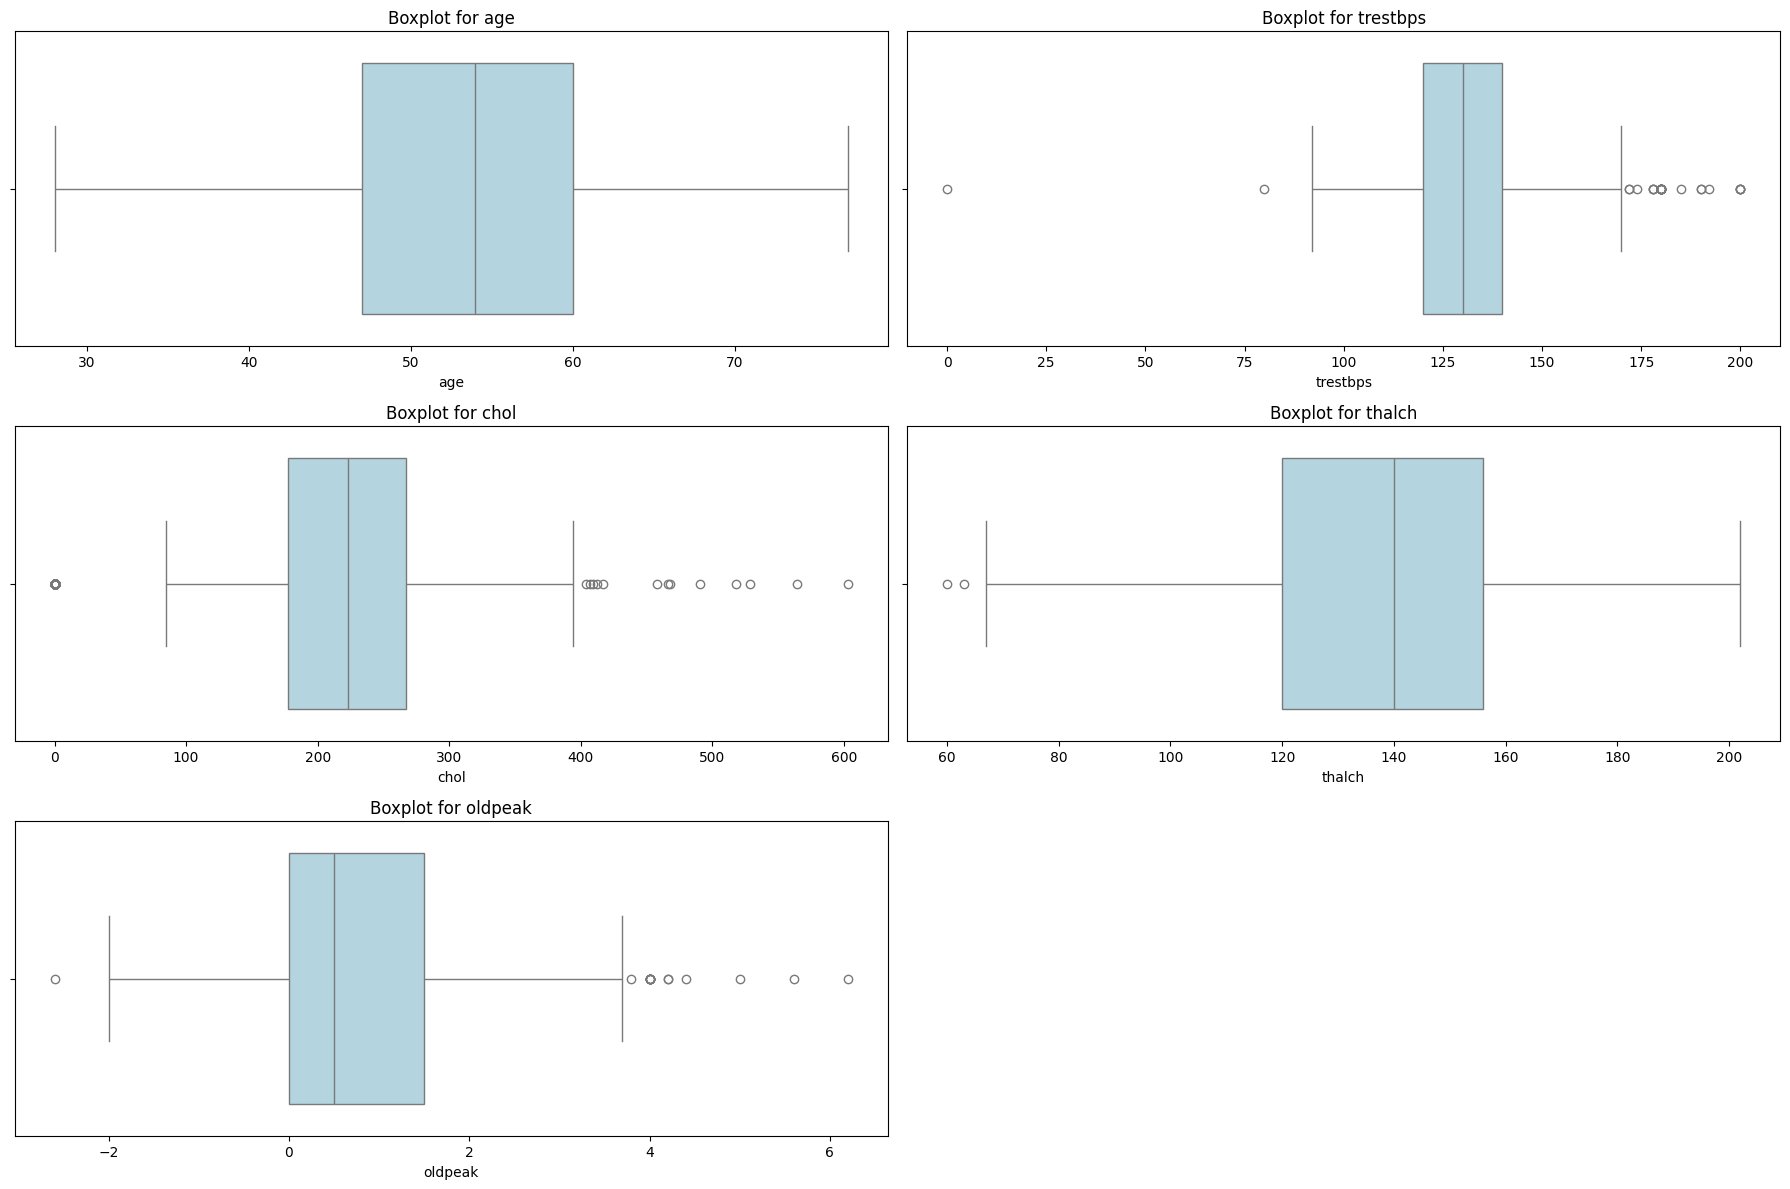

In [16]:
# Boxplot for Numerical Variables
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()
plt.show()

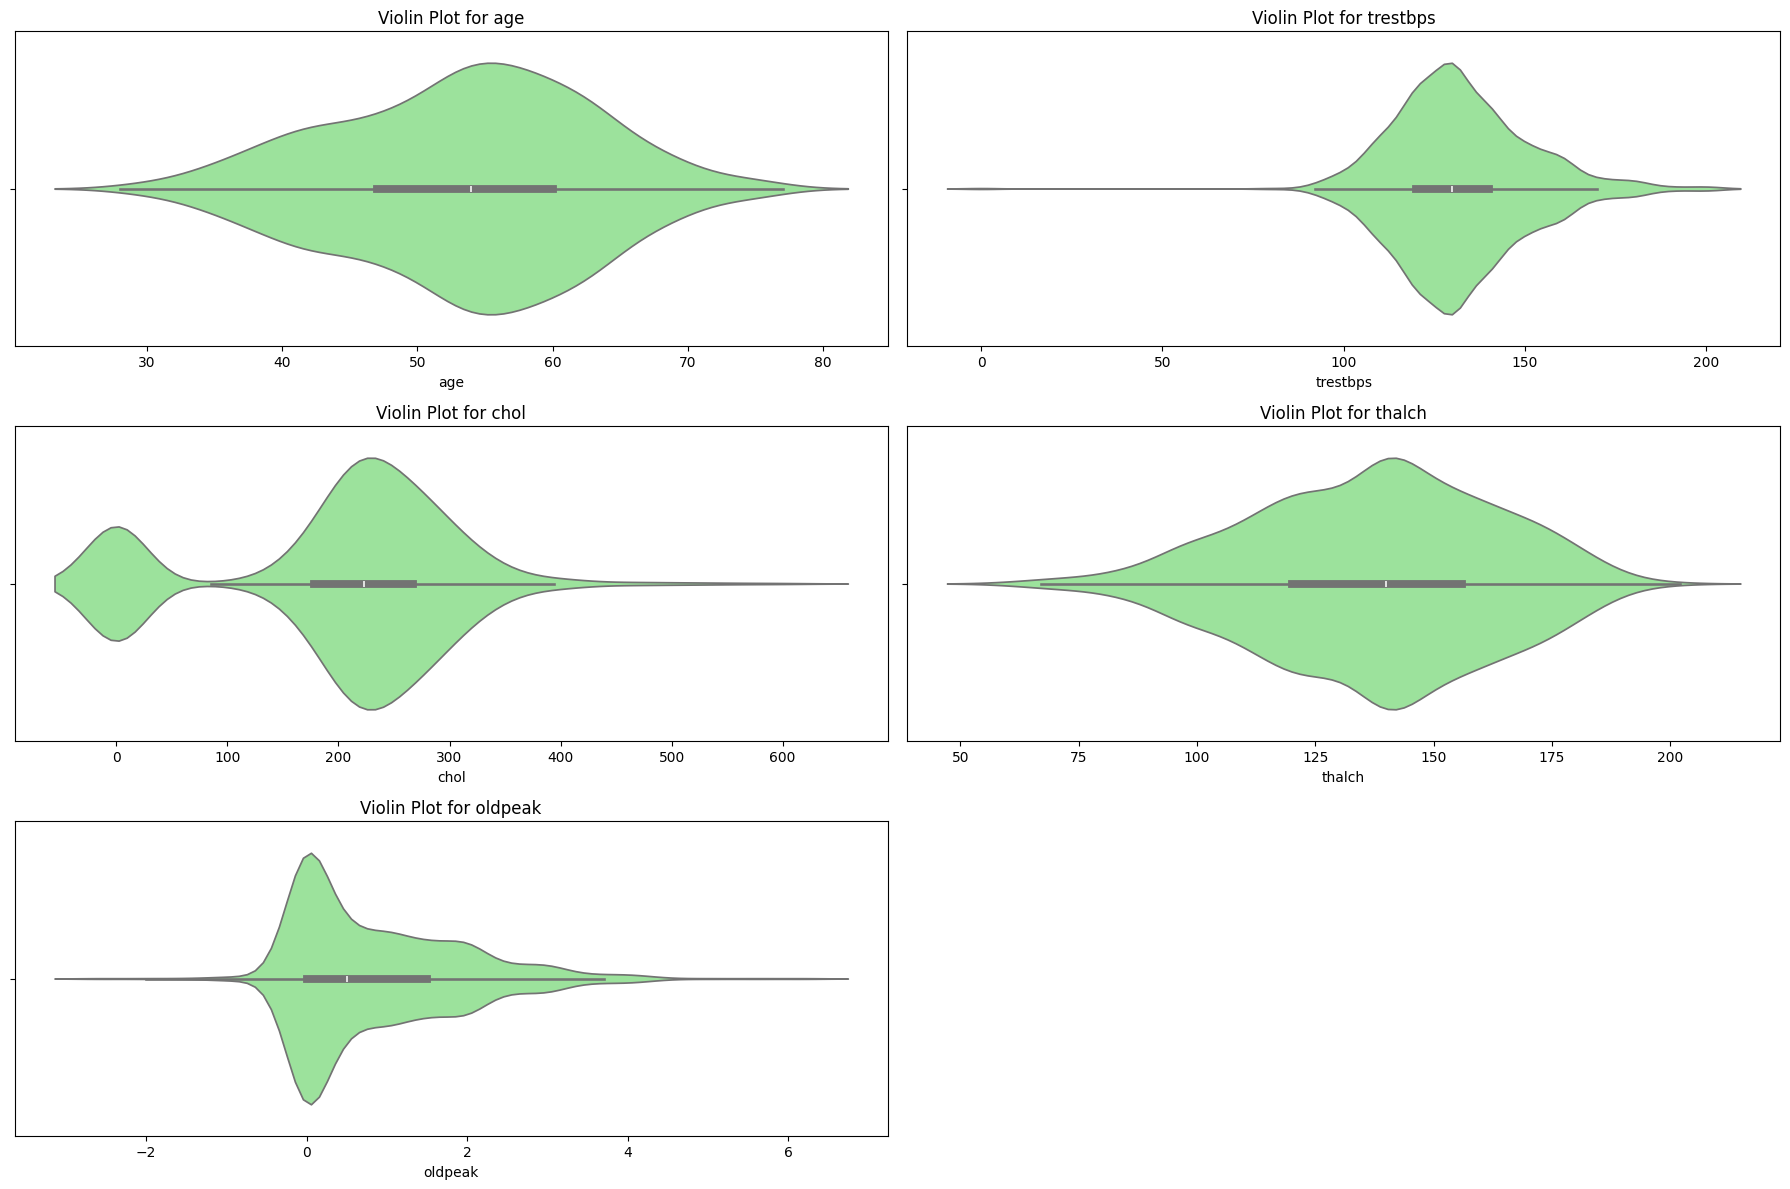

In [17]:
# Violin plot for numericall variables
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=df[column], color='lightgreen')
    plt.title(f'Violin Plot for {column}')
    plt.tight_layout()

plt.show()

### Outlier detection

In [18]:
# Descriptive statistics for numerical variables
df[numerical_columns].describe()

# Calculate IQR for detecting outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age         13.00
trestbps    20.00
chol        89.25
thalch      36.00
oldpeak      1.50
dtype: float64


In [19]:
# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Display rows containing outliers
outlier_rows = df[outliers.any(axis=1)]
print(outlier_rows)


     age        dataset               cp  trestbps   chol    fbs  \
14    52      Cleveland      non-anginal     172.0  199.0   True   
48    65      Cleveland      non-anginal     140.0  417.0   True   
83    68      Cleveland      non-anginal     180.0  274.0   True   
91    62      Cleveland     asymptomatic     160.0  164.0  False   
121   63      Cleveland     asymptomatic     150.0  407.0  False   
..   ...            ...              ...       ...    ...    ...   
841   74  VA Long Beach     asymptomatic     150.0  258.0   True   
854   55  VA Long Beach     asymptomatic     172.0  260.0  False   
863   64  VA Long Beach     asymptomatic     134.0  273.0  False   
889   57  VA Long Beach  atypical angina     180.0  285.0   True   
896   61  VA Long Beach     asymptomatic     190.0  287.0   True   

              restecg  thalch  exang  oldpeak  num  sex_Male  
14             normal   162.0  False      0.5    0      True  
48     lv hypertrophy   157.0  False      0.8    0     Fa

Since outliers can be useful for determining abnormal medical condition, we won't be removing them from our data.

# Multivariate Analysis

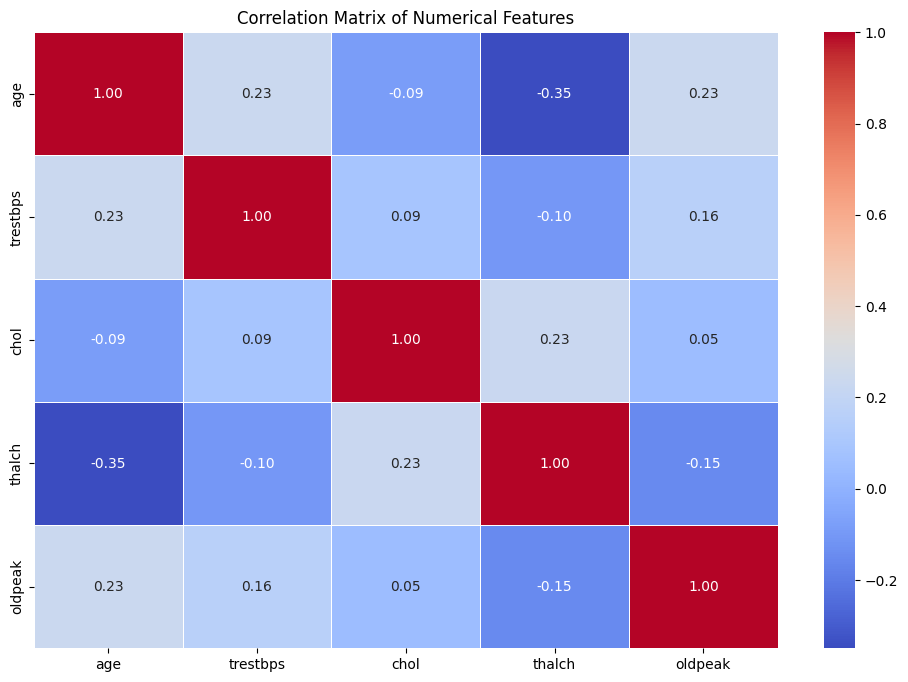

In [20]:
# Correlation matrix
corr_matrix = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].corr()

# Heatmap to visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


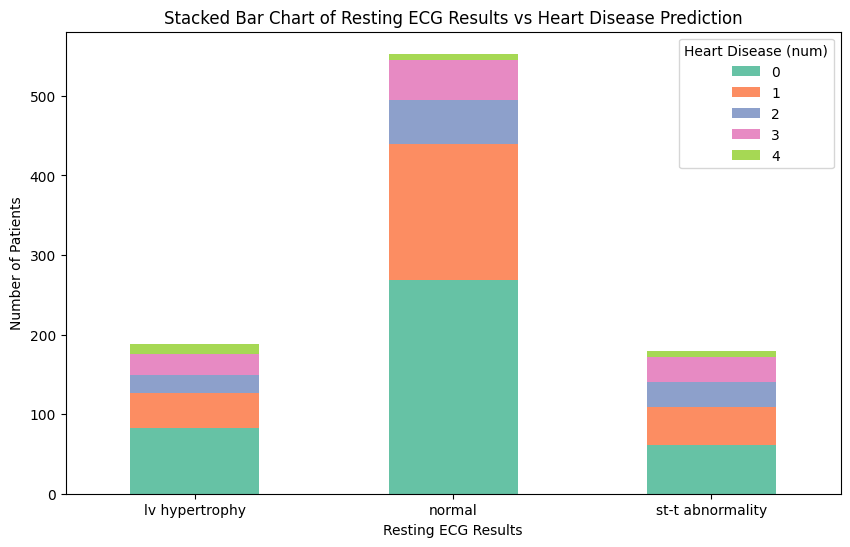

In [34]:
# Group by restecg and num to get counts
restecg_vs_num = df.groupby(['restecg', 'num']).size().unstack()

colors = sns.color_palette("Set2")
# Plot stacked column chart
restecg_vs_num.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
plt.xlabel('Resting ECG Results')
plt.ylabel('Number of Patients')
plt.title('Stacked Bar Chart of Resting ECG Results vs Heart Disease Prediction')
plt.legend(title='Heart Disease (num)', loc='upper right')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal

# Display the chart
plt.show()


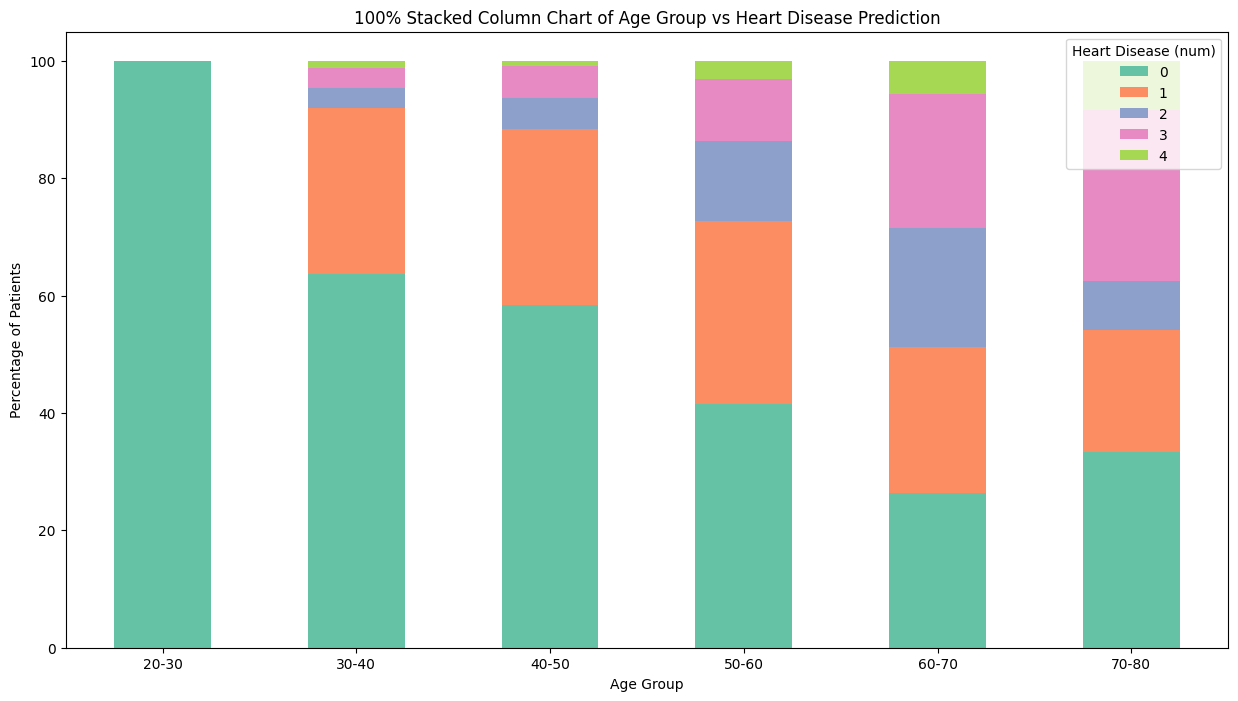

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Bin the age column into intervals (e.g., 30-40, 40-50, etc.)
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Group by age group and num to get counts
age_vs_num = df.groupby(['age_group', 'num'], observed=False).size().unstack()

# Convert to percentages (100% stacked)
age_vs_num_percentage = age_vs_num.div(age_vs_num.sum(axis=1), axis=0) * 100

# Plot the 100% stacked column chart
age_vs_num_percentage.plot(kind='bar', stacked=True, figsize=(15, 8), color=sns.color_palette('Set2'))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage of Patients')
plt.title('100% Stacked Column Chart of Age Group vs Heart Disease Prediction')
plt.legend(title='Heart Disease (num)', loc='upper right')
plt.xticks(rotation=0)

# Display the chart
plt.show()


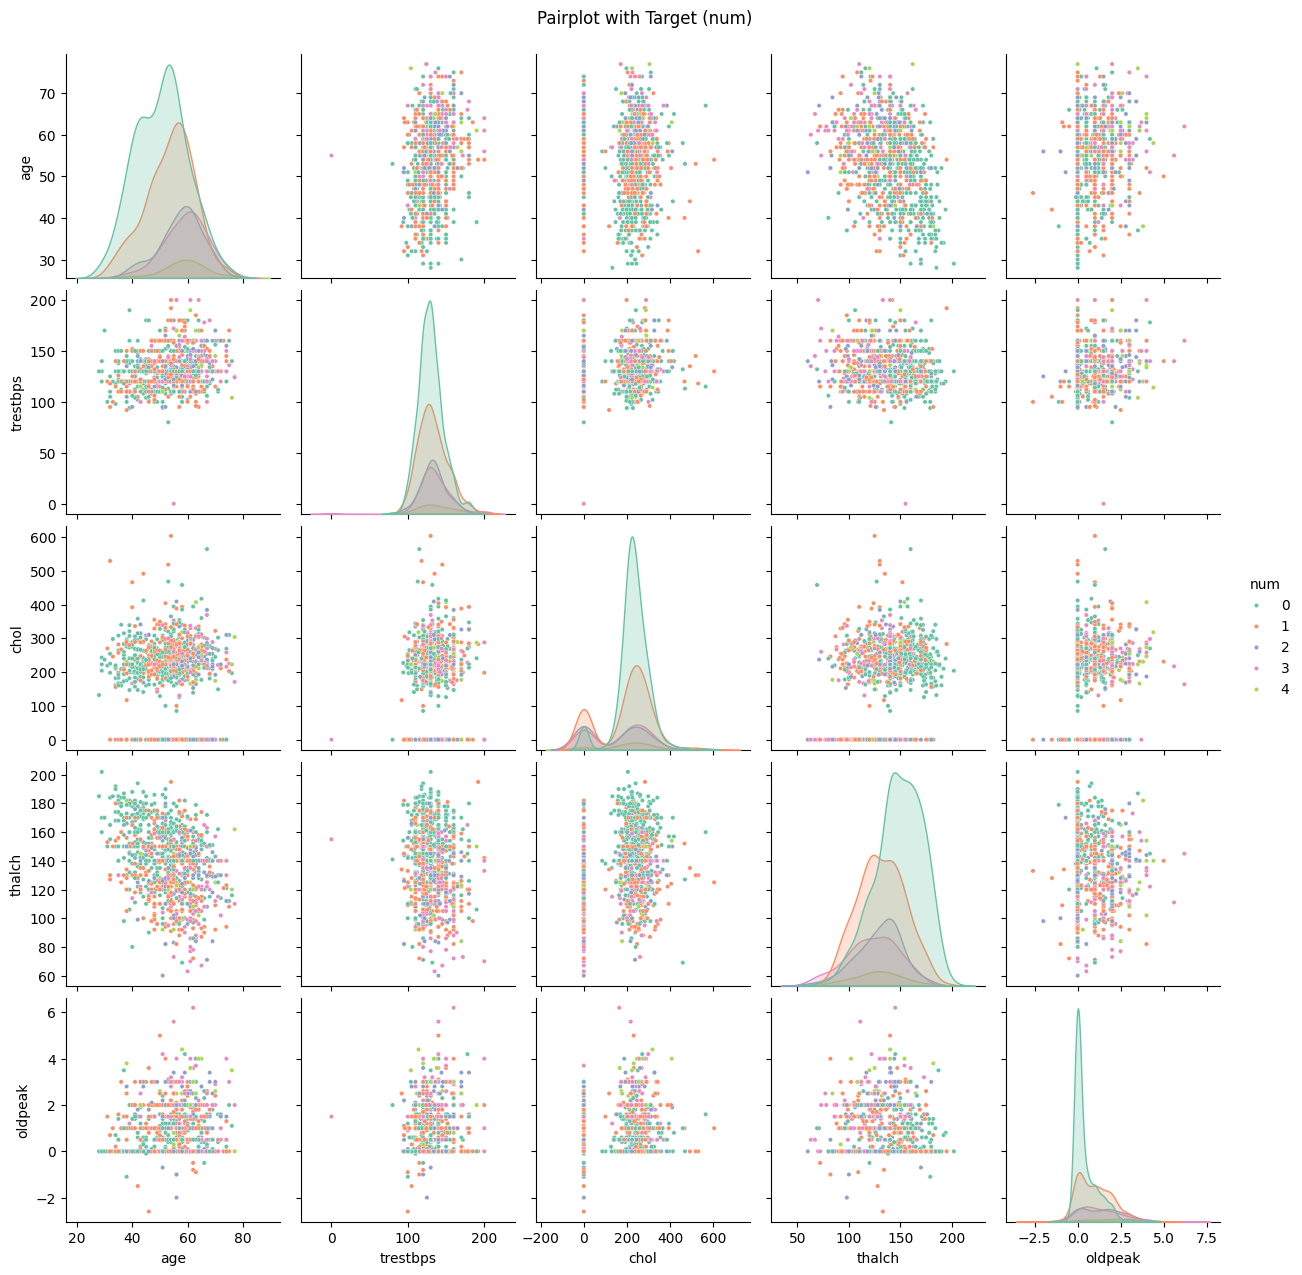

In [23]:
# Pairplot for selected features with 'num' as hue
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']], hue='num', diag_kind='kde', palette="Set2",plot_kws = {"s":10})
plt.suptitle('Pairplot with Target (num)', y=1.02)
plt.show()


<Axes: xlabel='exang', ylabel='cp'>

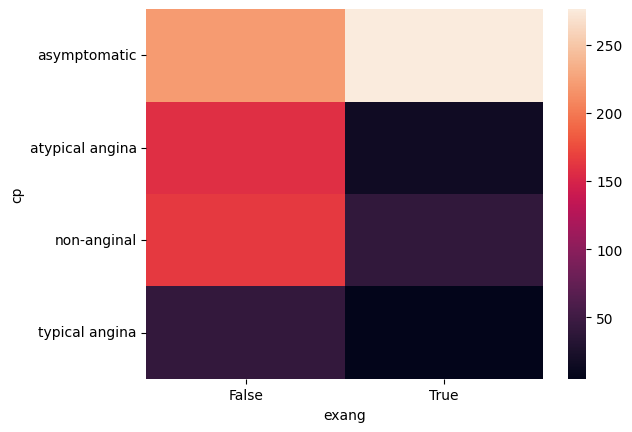

In [24]:
sns.heatmap(pd.crosstab(df.cp, df.exang))

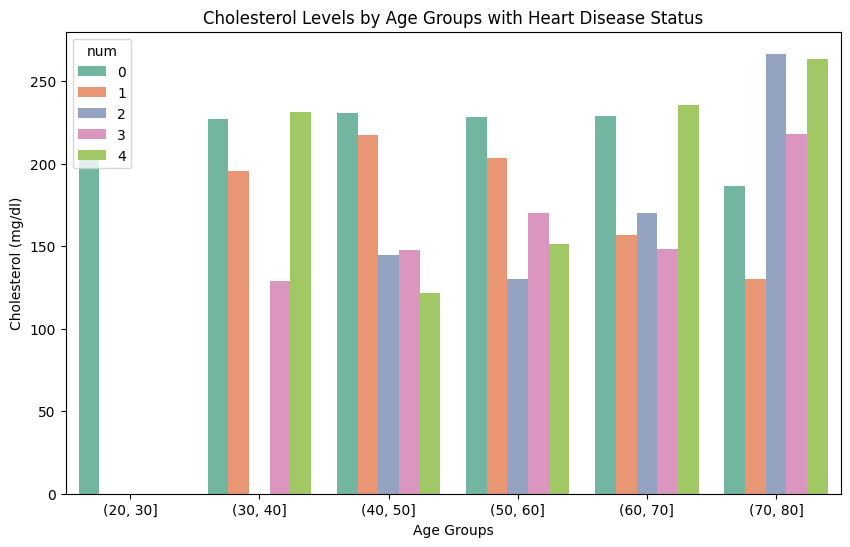

In [35]:
# Create age bins
age_bins = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80])
df['age_bins'] = age_bins

# Plot bar chart of cholesterol vs age bins with hue as 'num'
plt.figure(figsize=(10, 6))
sns.barplot(x='age_bins', y='chol', hue='num', data=df, palette='Set2', errorbar=None)

# Set plot labels and title
plt.title('Cholesterol Levels by Age Groups with Heart Disease Status')
plt.xlabel('Age Groups')
plt.ylabel('Cholesterol (mg/dl)')

# Show the plot
plt.show()

<Axes: xlabel='num', ylabel='trestbps'>

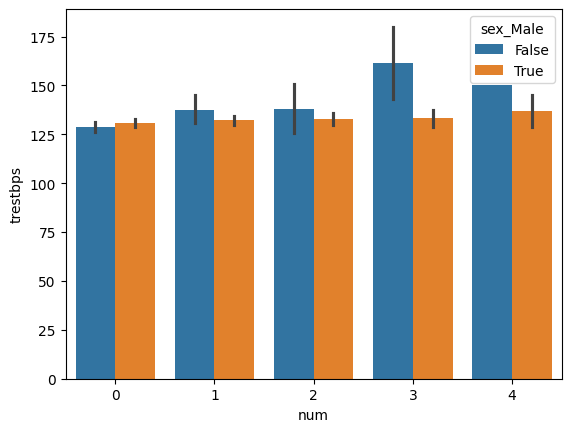

In [26]:
sns.barplot(data=df, x='num', y='trestbps', hue='sex_Male')
# plt.legend(labels=['Female','Male'])

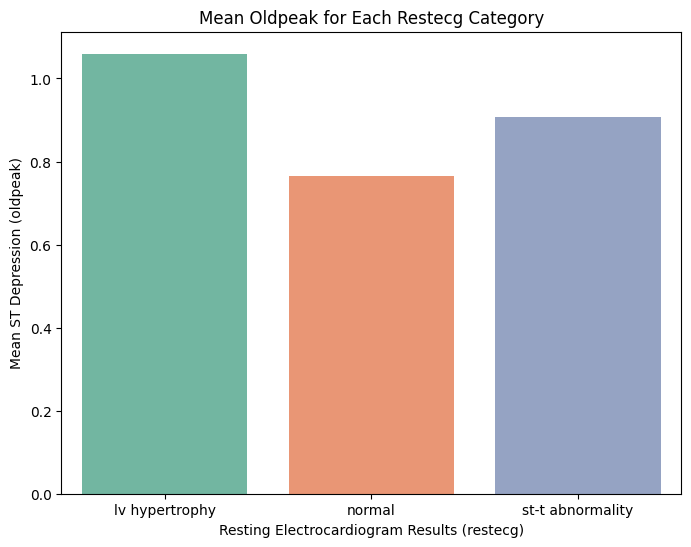

In [36]:
# Group the data by 'restecg' and calculate the mean of 'oldpeak'
mean_oldpeak = df.groupby('restecg')['oldpeak'].mean().reset_index()

# Plot a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='restecg', y='oldpeak', hue='restecg', data=mean_oldpeak, palette='Set2')

# Set plot labels and title
plt.title('Mean Oldpeak for Each Restecg Category')
plt.xlabel('Resting Electrocardiogram Results (restecg)')
plt.ylabel('Mean ST Depression (oldpeak)')

# Show the plot
plt.show()

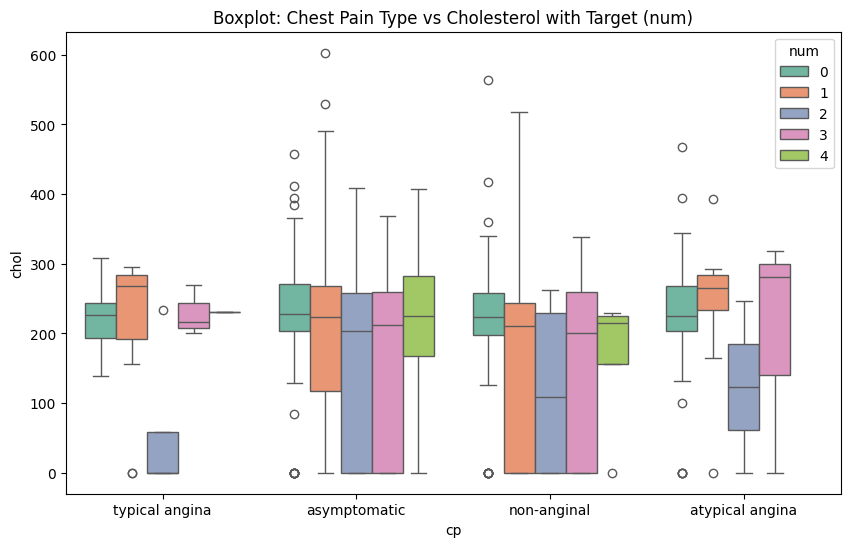

In [28]:
# Boxplot of 'cp' vs 'chol' colored by 'num'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='chol', hue='num', data=df, palette='Set2')
plt.title('Boxplot: Chest Pain Type vs Cholesterol with Target (num)')
plt.show()


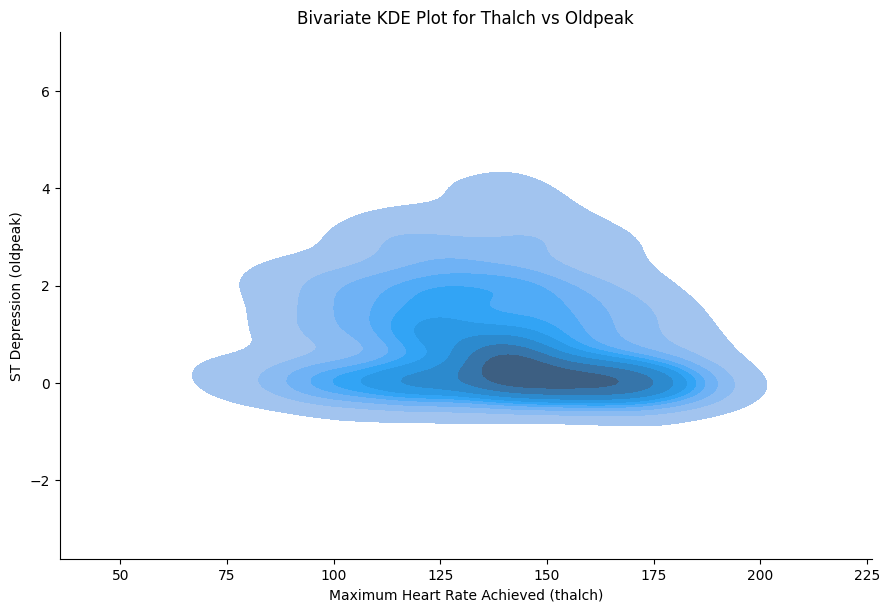

In [29]:
# Create a displot for thalch vs oldpeak using a bivariate KDE plot
sns.displot(df, x='thalch', y='oldpeak', kind='kde', aspect=1.5, height=6, fill=True)

# Set plot labels and title
plt.title('Bivariate KDE Plot for Thalch vs Oldpeak')
plt.xlabel('Maximum Heart Rate Achieved (thalch)')
plt.ylabel('ST Depression (oldpeak)')

# Show the plot
plt.show()

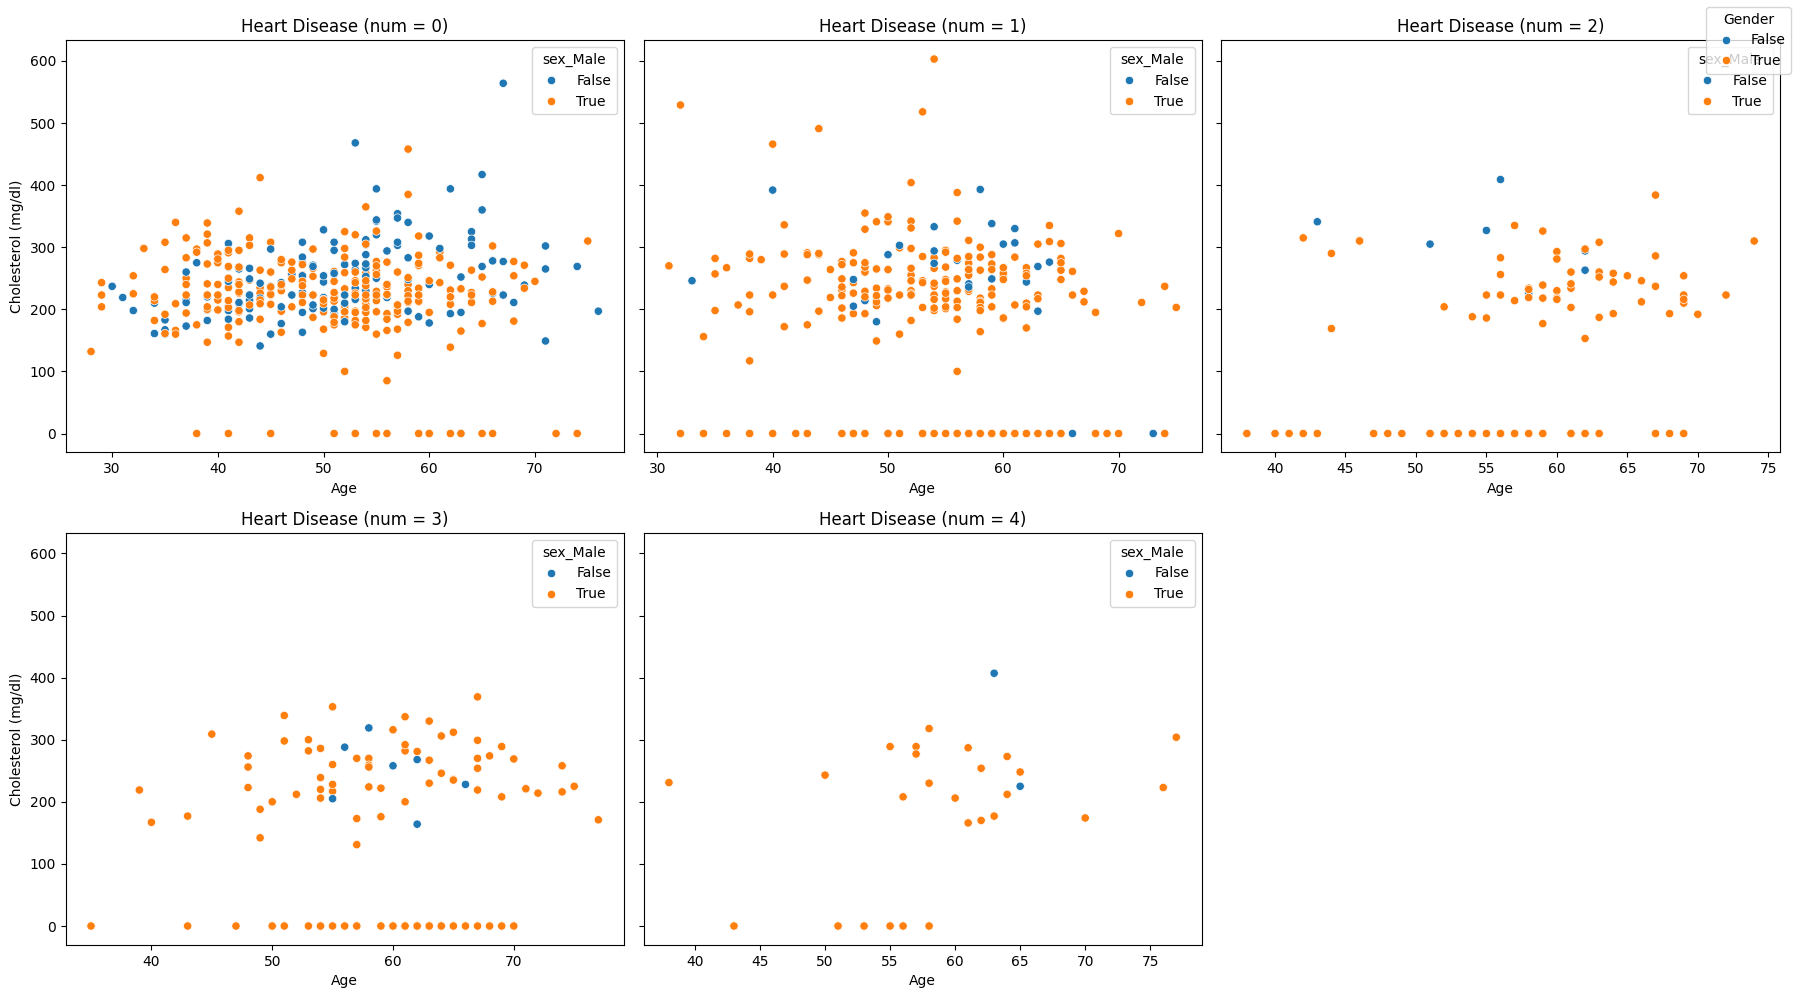

In [30]:
# Create a figure and subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Define a color palette for gender
palette = {0: "#1f77b4", 1: "#ff7f0e"}  # Adjust for gender (e.g., 0: Female, 1: Male)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each 'num' value and create a subplot for each
for i, num_val in enumerate(sorted(df['num'].unique())):
    # Filter the data for the current num value
    subset = df[df['num'] == num_val]

    # Create the scatter plot for chol vs age, hue as gender
    sns.scatterplot(data=subset, x='age', y='chol', hue='sex_Male', palette=palette, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Heart Disease (num = {num_val})')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Cholesterol (mg/dl)')

# Hide the last subplot (since we only have 5 plots but 6 spaces)
axes[-1].axis('off')

# Set a common legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Gender')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


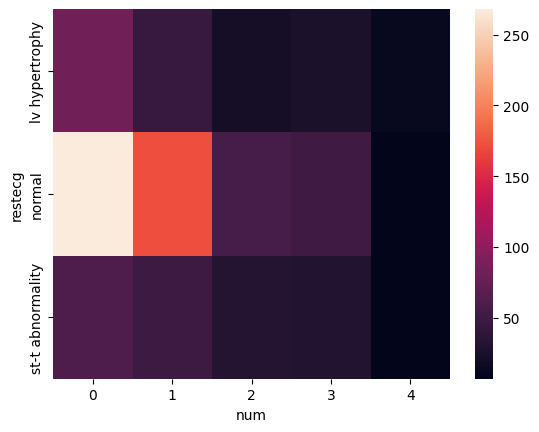

In [31]:
sns.heatmap(pd.crosstab(df.restecg, df.num))
plt.show()

# Observed Patterns and Conclusions

- The age distribution shows that most patients with heart disease are middle-aged or elderly. Heart disease risk increases with age, with a noticeable concentration of cases in patients above 50 years old.
- Asymptomatic chest pain is the most prevalent type among heart disease patients, suggesting that many patients do not experience the classic symptoms of angina, and yet they have heart conditions.
- A notable portion of patients with heart disease experience exercise-induced angina, suggesting that physical exertion tends to bring out symptoms of heart disease. Patients who experience this are more likely to be in more advanced stages of heart disease.
- Both resting blood pressure and cholesterol levels show considerable variation, but the presence of outliers suggests some patients have abnormally high levels. Elevated blood pressure and cholesterol are well-known risk factors for heart disease.
- Higher cholesterol levels generally correlate with the presence of heart disease. While some patients with lower cholesterol levels also show signs of heart disease, most high-cholesterol patients in the dataset have heart disease.
- Patients with high resting blood pressure and exercise-induced angina are at a significantly increased risk for heart disease. These patients may require closer monitoring and more aggressive intervention to manage their heart conditions